In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from bs4 import BeautifulSoup as bs
import requests
import os
import re
import glob

from datetime import datetime
import dataframe_image as dfi
from statsmodels.tsa.seasonal import seasonal_decompose
import time

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

In [2]:
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4"

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4


In [3]:
# function to download all listings data
def get_listings_lisbon_timeseries():
    """Function scraping all links to listings.csv files available on insideairbnb.com
    website, and saving downloaded files in a /data/raw-data folder.
    The files are named after their collection date (YYYY-MM.csv)."""
    soup = bs(requests.get('http://insideairbnb.com/get-the-data.html').content,'lxml')
    link_lst = [i['href'] for i in soup.select("td:contains('Lisbon')+td>a[onclick*=listings]")]
    subfolder_names = ['raw-data']
    for subfolder_name in subfolder_names:
        os.makedirs(os.path.join('data5',subfolder_name))
    for link in link_lst:
        file = pd.read_csv(link)
        date = re.findall(r'20\d{2}-\d{2}',link)[0]
        file.to_csv(f'data5/raw-data/lisbon_{date}.csv',index=False)
get_listings_lisbon_timeseries()

In [4]:
# pull in detailed_listings
raw_df_lisbon = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lisbon/lisbon_detailed.csv')

print(f"The detailed listings dataset contains {len(raw_df_lisbon)} AirBnb listings.")
#print(f"The most recent listings dataset contains {len(lisbon_raw_df_11_4_2021)} Airbnb listings.")


The detailed listings dataset contains 18760 AirBnb listings.


In [5]:
lisbon_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lisbon/lisbon_2020-12.csv')
lisbon_raw_df_12_12_2020.shape





(20141, 16)

In [6]:
# use magic commands 'cd' to change directory
# use glob to locate all files for lisbon
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1"
files_lisbon = glob.glob('lisbon/**.csv')
files_lisbon

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1


['lisbon/Lisbon_2021-05.csv',
 'lisbon/Lisbon_2021-04.csv',
 'lisbon/Lisbon_2021-10.csv',
 'lisbon/Lisbon_2021-06.csv',
 'lisbon/Lisbon_2021-07.csv',
 'lisbon/Lisbon_2021-03.csv',
 'lisbon/Lisbon_2021-02.csv',
 'lisbon/Lisbon_2021-01.csv',
 'lisbon/Lisbon_2020-12.csv',
 'lisbon/Lisbon_2021-09.csv',
 'lisbon/Lisbon_2021-08.csv']

In [7]:
# create individual dataframes for each file
# summarize each file (# of listings; avg price in euro)

lisbon_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lisbon/lisbon_2020-12.csv')
print(f"The 12_12_2020 dataset contains {len(lisbon_raw_df_12_12_2020)} AirBnb listings; the avg price is €{round(lisbon_raw_df_12_12_2020['price'].mean(),2)}.")

lisbon_raw_df_1_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lisbon/lisbon_2021-01.csv')
print(f"The 1_9_2021 dataset contains {len(lisbon_raw_df_1_9_2021)} AirBnb listings; the avg price is €{round(lisbon_raw_df_1_9_2021['price'].mean(),2)}.")

lisbon_raw_df_2_8_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lisbon/lisbon_2021-02.csv')
print(f"The 2_8_2021 dataset contains {len(lisbon_raw_df_2_8_2021)} AirBnb listings; the avg price is €{round(lisbon_raw_df_2_8_2021['price'].mean(),2)}.")

lisbon_raw_df_3_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lisbon/lisbon_2021-03.csv')
print(f"The 3_4_2021 dataset contains {len(lisbon_raw_df_3_4_2021)} AirBnb listings; the avg price is €{round(lisbon_raw_df_3_4_2021['price'].mean(),2)}.")

lisbon_raw_df_4_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lisbon/lisbon_2021-04.csv')
print(f"The 4_9_2021 dataset contains {len(lisbon_raw_df_4_9_2021)} AirBnb listings; the avg price is €{round(lisbon_raw_df_4_9_2021['price'].mean(),2)}.")

lisbon_raw_df_5_19_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lisbon/lisbon_2021-05.csv')
print(f"The 5_19_2021 dataset contains {len(lisbon_raw_df_5_19_2021)} AirBnb listings; the avg price is €{round(lisbon_raw_df_5_19_2021['price'].mean(),2)}.")

lisbon_raw_df_6_3_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lisbon/lisbon_2021-06.csv')
print(f"The 6_3_2021 dataset contains {len(lisbon_raw_df_6_3_2021)} AirBnb listings; the avg price is €{round(lisbon_raw_df_6_3_2021['price'].mean(),2)}.")

lisbon_raw_df_7_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lisbon/lisbon_2021-07.csv')
print(f"The 7_4_2021 dataset contains {len(lisbon_raw_df_7_4_2021)} AirBnb listings; the avg price is €{round(lisbon_raw_df_7_4_2021['price'].mean(),2)}.")

lisbon_raw_df_8_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lisbon/lisbon_2021-08.csv')
print(f"The 8_6_2021 dataset contains {len(lisbon_raw_df_8_6_2021)} AirBnb listings; the avg price is €{round(lisbon_raw_df_8_6_2021['price'].mean(),2)}.")

lisbon_raw_df_9_7_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lisbon/lisbon_2021-09.csv')
print(f"The 9_7_2021 dataset contains {len(lisbon_raw_df_9_7_2021)} AirBnb listings; the avg price is €{round(lisbon_raw_df_9_7_2021['price'].mean(),2)}.")

lisbon_raw_df_10_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lisbon/lisbon_2021-10.csv')
print(f"The 10_6_2021 dataset contains {len(lisbon_raw_df_10_6_2021)} AirBnb listings; the avg price is €{round(lisbon_raw_df_10_6_2021['price'].mean(),2)}.")

#lisbon_raw_df_11_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lisbon/lisbon_2021-11.csv')
#print(f"The 11_4_2021 dataset contains {len(lisbon_raw_df_11_4_2021)} AirBnb listings; the avg price is €{round(lisbon_raw_df_11_4_2021['price'].mean(),2)}.")


The 12_12_2020 dataset contains 20141 AirBnb listings; the avg price is €103.15.
The 1_9_2021 dataset contains 20057 AirBnb listings; the avg price is €96.05.
The 2_8_2021 dataset contains 19877 AirBnb listings; the avg price is €95.25.
The 3_4_2021 dataset contains 19804 AirBnb listings; the avg price is €95.45.
The 4_9_2021 dataset contains 19819 AirBnb listings; the avg price is €97.42.
The 5_19_2021 dataset contains 19762 AirBnb listings; the avg price is €103.66.
The 6_3_2021 dataset contains 19281 AirBnb listings; the avg price is €106.87.
The 7_4_2021 dataset contains 19458 AirBnb listings; the avg price is €108.3.
The 8_6_2021 dataset contains 19339 AirBnb listings; the avg price is €110.56.
The 9_7_2021 dataset contains 19106 AirBnb listings; the avg price is €106.12.
The 10_6_2021 dataset contains 18761 AirBnb listings; the avg price is €104.58.


In [8]:
df_list_lisbon = [lisbon_raw_df_12_12_2020, lisbon_raw_df_1_9_2021, lisbon_raw_df_2_8_2021,
           lisbon_raw_df_3_4_2021, lisbon_raw_df_4_9_2021, lisbon_raw_df_5_19_2021, lisbon_raw_df_6_3_2021, lisbon_raw_df_7_4_2021,
           lisbon_raw_df_8_6_2021, lisbon_raw_df_9_7_2021, lisbon_raw_df_10_6_2021]

dates_lisbon = ['12_12_2020', '01_9_2021', '02_08_2021','03_04_2021', '04_09_2021', '05_19-2021'
        '06_03_2021', '07_04_2021', '08_06_2021', '09_07_2021', '10_06_2021']

files_lisbon = ['2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08',
                  '2021-09', '2021-10']


df_final_lisbon = []

def airbnb_parse_lisbon(df_list, files):
    for file in files_lisbon:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/lisbon/lisbon_{file}.csv")
        print(f"The {file} lisbon dataset contains {len(df_file)} AirBnb listings -- the avg price is €{round(df_file['price'].mean(),2)}.")
        #print(f"The avg price per night out of {len(df_file)} listings is  ${round(df_file['price'].mean(),2)}.")


def airbnb_to_frame_lisbon(df_list, dates):
    for file in files_lisbon:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/lisbon/lisbon_{file}.csv")
        #print(f"The {date} Paris dataset contains {len(df_file)} AirBnb listings -- the avg price is ${round(df_file['price'].mean(),2)}.")
        df_final_lisbon.append(
        {
            'Date of scrape': file.replace('_', '/'),
            '# of Listings': len(df_file),
            'Avg Price': round(df_file['price'].mean(),2),
            'Median Price': round(df_file['price'].median(),2),
            'Min Price': df_file['price'].min(),
            'Max Price': df_file['price'].max(),
            'Avg reviews per month': round(df_file['reviews_per_month'].mean(),2)
        })
    
    return pd.DataFrame(df_final_lisbon)

lisbon_parse = airbnb_parse_lisbon(df_list_lisbon, files_lisbon)


The 2020-12 lisbon dataset contains 20141 AirBnb listings -- the avg price is €103.15.
The 2021-01 lisbon dataset contains 20057 AirBnb listings -- the avg price is €96.05.
The 2021-02 lisbon dataset contains 19877 AirBnb listings -- the avg price is €95.25.
The 2021-03 lisbon dataset contains 19804 AirBnb listings -- the avg price is €95.45.
The 2021-04 lisbon dataset contains 19819 AirBnb listings -- the avg price is €97.42.
The 2021-05 lisbon dataset contains 19762 AirBnb listings -- the avg price is €103.66.
The 2021-06 lisbon dataset contains 19281 AirBnb listings -- the avg price is €106.87.
The 2021-07 lisbon dataset contains 19458 AirBnb listings -- the avg price is €108.3.
The 2021-08 lisbon dataset contains 19339 AirBnb listings -- the avg price is €110.56.
The 2021-09 lisbon dataset contains 19106 AirBnb listings -- the avg price is €106.12.
The 2021-10 lisbon dataset contains 18761 AirBnb listings -- the avg price is €104.58.


In [9]:
lisbon_summary = airbnb_to_frame_lisbon(df_list_lisbon, files_lisbon)
lisbon_summary['Date of scrape'] = pd.to_datetime(lisbon_summary['Date of scrape'])
lisbon_summary['City'] = 'lisbon'
lisbon_summary

,Date of scrape,# of Listings,Avg Price,Median Price,Min Price,Max Price,Avg reviews per month,City
0,2020-12-01,20141,103.15,66.0,0,19988,1.23,lisbon
1,2021-01-01,20057,96.05,60.0,0,20282,1.20,lisbon
2,2021-02-01,19877,95.25,60.0,0,20199,1.16,lisbon
3,2021-03-01,19804,95.45,60.0,0,20534,1.13,lisbon
4,2021-04-01,19819,97.42,65.0,0,20447,1.09,lisbon
5,2021-05-01,19762,103.66,66.0,0,20171,1.08,lisbon
6,2021-06-01,19281,106.87,70.0,0,20435,1.16,lisbon
7,2021-07-01,19458,108.30,72.0,0,20628,1.18,lisbon
8,2021-08-01,19339,110.56,76.0,0,11499,1.22,lisbon
9,2021-09-01,19106,106.12,75.0,0,11499,1.32,lisbon


In [10]:
master_df_lisbon = pd.concat(df_list_lisbon)
master_df_lisbon_unique = master_df_lisbon.drop_duplicates(subset='id')
master_df_lisbon_unique.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6499,Belém 1 Bedroom Historical Apartment,14455,Bruno,Lisboa,Belm,38.69750,-9.19768,Entire home/apt,79,3,26,2020-01-03,0.34,1,355,NaN,NaN
1,25659,Heart of Alfama - Coeur d'Alfama - Lisbon Center,107347,Ellie,Lisboa,Santa Maria Maior,38.71167,-9.12696,Entire home/apt,50,3,113,2019-12-08,1.39,1,363,NaN,NaN
2,29248,Apartamento Alfama com vista para o rio!,125768,Bárbara,Lisboa,Santa Maria Maior,38.71272,-9.12628,Entire home/apt,42,3,324,2020-11-01,2.67,1,348,NaN,NaN
3,29396,Alfama Hill - Boutique apartment,126415,Mónica,Lisboa,Santa Maria Maior,38.71156,-9.12987,Entire home/apt,36,2,260,2020-12-14,2.49,2,327,NaN,NaN
4,29915,Modern and Cool Apartment in Lisboa,128890,Sara,Lisboa,Avenidas Novas,38.74712,-9.15286,Entire home/apt,48,5,39,2020-12-17,0.31,1,270,NaN,NaN


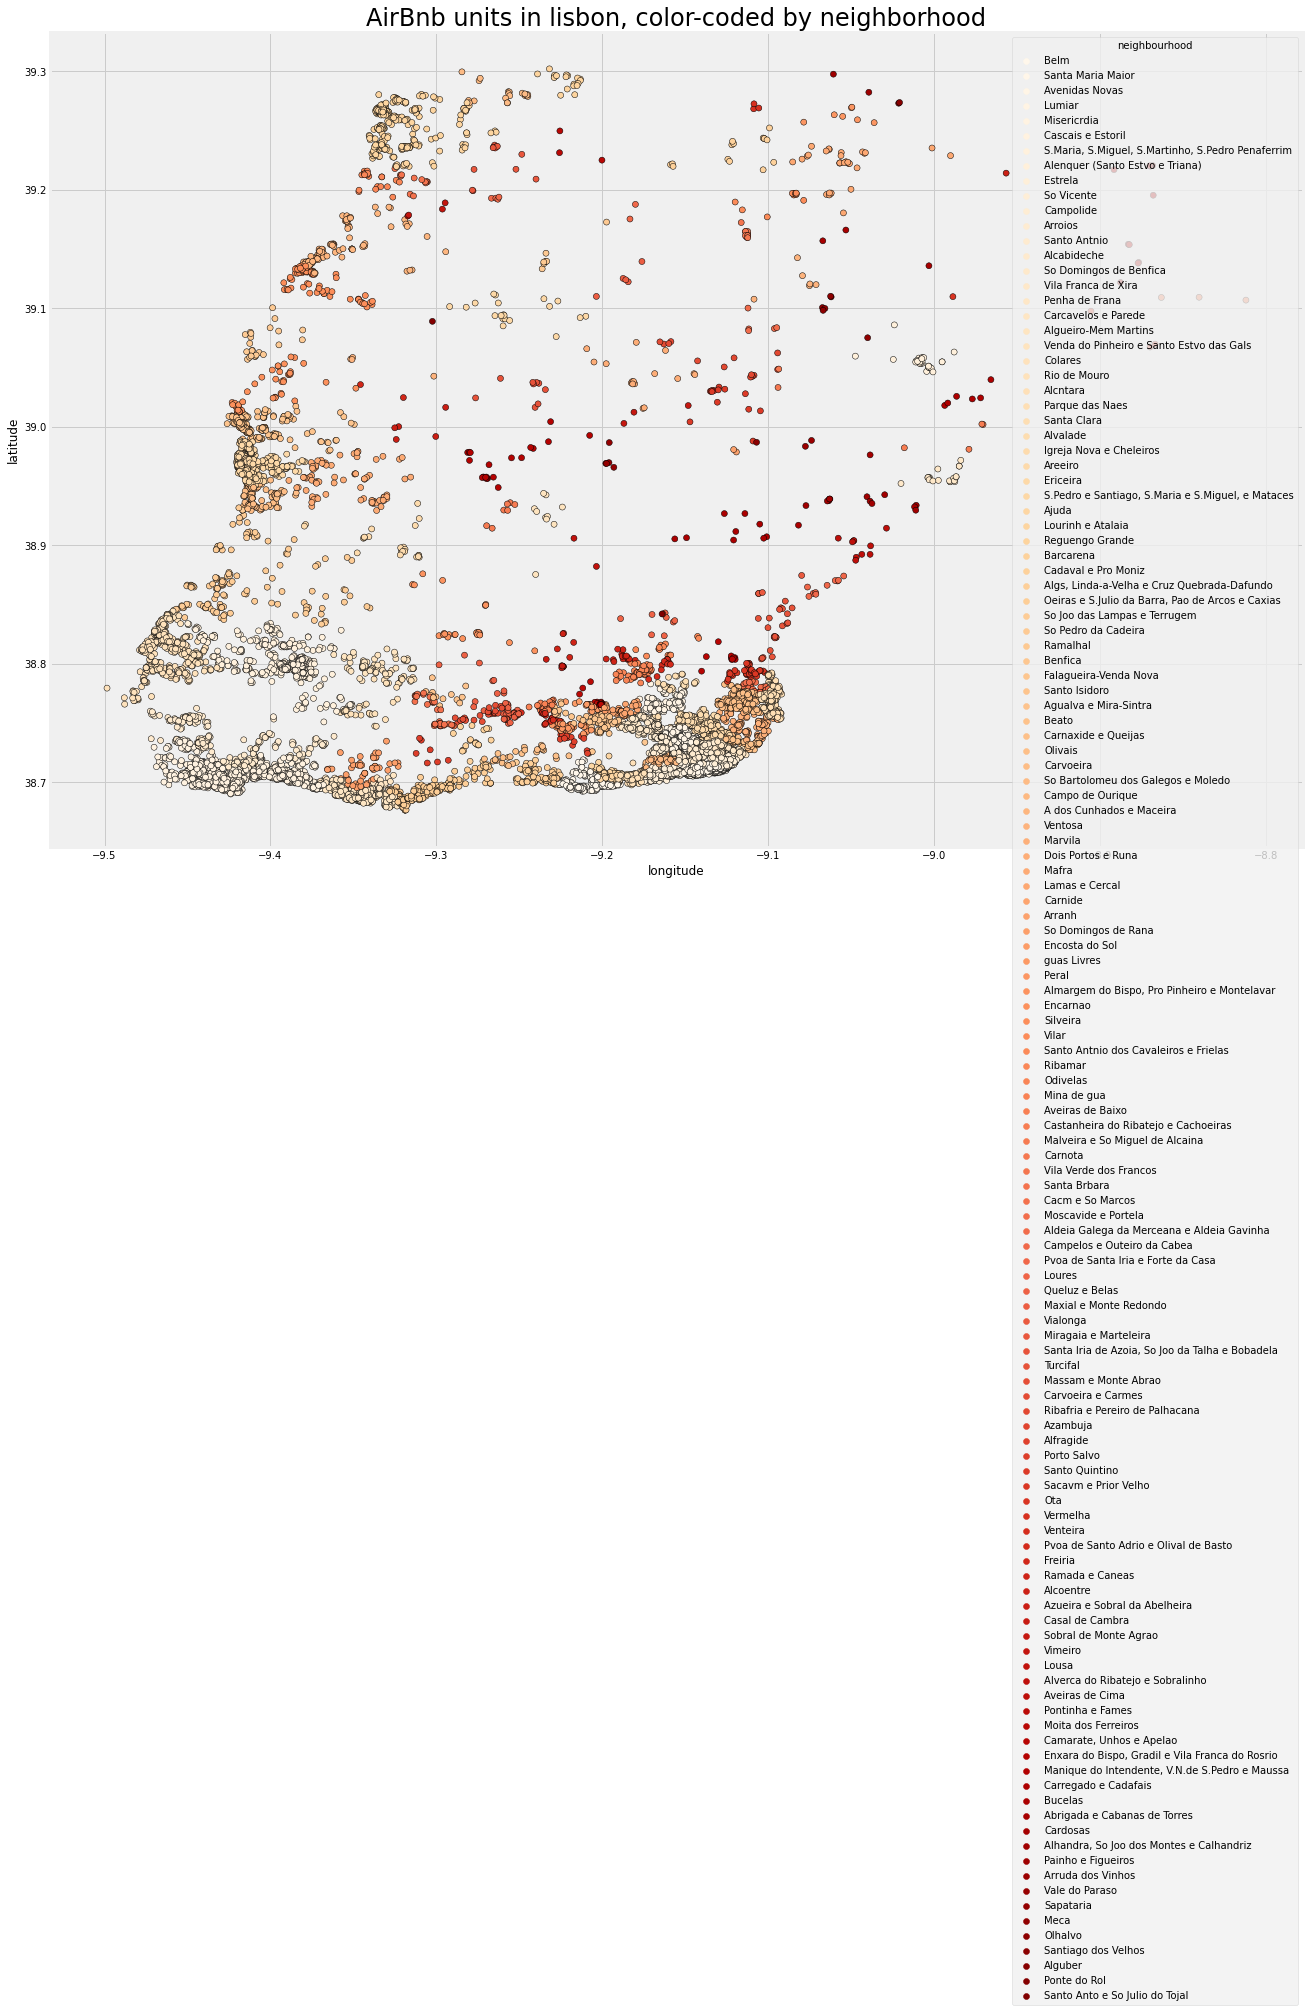

In [11]:
title = 'AirBnb units in lisbon, color-coded by neighborhood'
plt.figure(figsize=(20,15))
sns.set_palette("OrRd")
sns.scatterplot(master_df_lisbon_unique.longitude, master_df_lisbon_unique.latitude, hue = master_df_lisbon_unique.neighbourhood, palette='OrRd', edgecolor='black').set_title(title, fontsize=24)
plt.savefig('airbnb_unit_lisbon.png')
plt.show()

## Add review data through a join

In [12]:
df_reviews = pd.concat([lisbon_raw_df_10_6_2021,raw_df_lisbon],axis=1, join='outer')
df_reviews_ = df_reviews.loc[:,~df_reviews.columns.duplicated()]
df_reviews_

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,6499,Belém 1 Bedroom Historical Apartment,14455,Bruno,Lisboa,Belm,38.697500,-9.197680,Entire home/apt,40,...,4.38,4.33,4.79,4.97,4.86,4.52,t,1.0,0.0,0.0
1,25659,Heart of Alfama Lisbon Center - Cœur de l'Alfama,107347,Ellie,Lisboa,Santa Maria Maior,38.712410,-9.127060,Entire home/apt,45,...,4.89,4.89,4.98,4.97,4.88,4.83,t,1.0,0.0,0.0
2,29248,Apartamento Alfama com vista para o rio!,125768,Bárbara,Lisboa,Santa Maria Maior,38.710820,-9.127190,Entire home/apt,54,...,4.62,4.37,4.64,4.74,4.82,4.61,t,1.0,0.0,0.0
3,29396,Alfama Hill - Boutique apartment,126415,Mónica,Lisboa,Santa Maria Maior,38.711560,-9.129870,Entire home/apt,51,...,4.84,4.81,4.88,4.90,4.88,4.75,t,1.0,0.0,0.0
4,29720,TheHOUSE - Your luxury home,128075,Francisco,Lisboa,Estrela,38.711080,-9.159790,Entire home/apt,1114,...,4.91,4.84,4.98,4.96,4.89,4.62,f,1.0,0.0,0.0
5,29915,Modern and Cool Apartment in Lisboa,128890,Sara,Lisboa,Avenidas Novas,38.745710,-9.152640,Entire home/apt,50,...,4.92,4.87,4.79,4.74,4.68,4.71,f,1.0,0.0,0.0
6,33348,Happy Season,144484,Bruno,Lisboa,Lumiar,38.764270,-9.153010,Private room,40,...,5.00,4.50,4.50,4.50,4.50,4.50,f,1.0,1.0,0.0
7,40817,"Chiado, Alecrim walk to Riverfront",176410,S.,Lisboa,Misericrdia,38.709030,-9.143130,Entire home/apt,122,...,4.56,4.48,4.67,4.66,4.81,4.43,t,6.0,0.0,0.0
8,42519,Nice Apart.BAIRRO ALTO (ADAMASTOR) 6-1º,136230,David,Lisboa,Misericrdia,38.710620,-9.149000,Entire home/apt,50,...,4.45,4.62,4.61,4.48,4.75,4.50,t,11.0,0.0,0.0
9,48025,Apartment for renting in Lisbon,218778,José,Lisboa,Misericrdia,38.711950,-9.144630,Entire home/apt,65,...,4.53,4.35,4.71,4.76,4.59,4.12,f,5.0,0.0,0.0


## Regression

In [13]:
#df_reviews_.columns

In [14]:
df_regression = df_reviews_.copy()
df_regression_ = df_regression[['id', 'property_type', 'room_type', 'accommodates',
                               'bedrooms', 'beds', 'price', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
df_regression_ = df_regression_[df_regression_['beds'].notna()]
df_regression_ = df_regression_[df_regression_['bedrooms'].notna()]
df_regression_['price'] = pd.to_numeric(df_regression_['price'])
df_regression_.isna().sum()

df_regression_=df_regression_.fillna(df_regression_.mean())

In [15]:
X_ = df_regression_[['accommodates', 'bedrooms','beds',
        'availability_90','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]

y = df_regression_['price'].replace({'\$':''}, regex = True)
Y = y.replace({',':''}, regex=True)

# with sklearn
regr = LinearRegression()
regr.fit(X_, Y)

print('Intercept: ', regr.intercept_)
print('Coefficients: ', regr.coef_)

print (regr)

Intercept:  -83.37742825880868
Coefficients:  [  8.64496073  38.30772519   0.31516974   0.26227367   6.08737241
  -0.40837335  14.10679019  20.30768664 -24.65482337]
LinearRegression()


In [16]:
y_pred2 = regr.predict(X_)

In [17]:
df_mult= pd.DataFrame({'Actual': Y, 'Predicted': y_pred2.flatten()})
df_mult['Diff'] = df_mult['Predicted'] - df_mult['Actual']
df_mult_sort = df_mult.sort_values(by=['Diff'])
#df_result = (df_mult_sort[df_mult_sort['Actual'] >=75]) && (df_mult_sort[df_mult_sort['Actual'] <=300])
df_result = df_mult_sort.query('Actual >= 75 & Actual <= 400')
df_result.head()

,Actual,Predicted,Diff
6489,400,55.899519,-344.100481
12468,393,50.528220,-342.471780
9930,400,66.446386,-333.553614
16979,400,66.851307,-333.148693
7505,400,67.018572,-332.981428


<function matplotlib.pyplot.ylim(*args, **kwargs)>

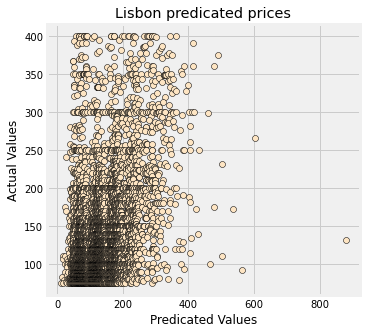

In [18]:
x = df_result['Predicted']
y = df_result['Actual']
plt.figure(figsize=(5,5))
plt.title('')
plt.xlabel('Predicated Values')
plt.ylabel('Actual Values')
plt.title('Lisbon predicated prices')
plt.scatter(x,y, edgecolor='black')
plt.ylim